In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import seaborn as sns
import os
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC 
# from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('data.xlsx')
df
# df.to_csv('data.csv', index=False)


,Proses ID,Proses Tipi,Proses Addımı,Emal Həcmi (ton),Temperatur (°C),Təzyiq (bar),Prosesin Müddəti (saat),İstifadə Edilən Katalizatorlar,Emalın Səmərəliliyi (%),Enerji İstifadəsi (kWh),Ətraf Mühitə Təsir (g CO2 ekvivalent),Təhlükəsizlik Hadisələri,Emal Məhsulları,Əməliyyat Xərcləri (AZN),İstifadə Edilən Avadanlıq,İşçi Sayı,Prosesin Başlama Tarixi,Prosesin Bitmə Tarixi,Təchizatçı Adı,Proses Qrupları
0,1,Neft Emalı,Distillə,1000,350,5,12,Kükürdizolyan katalizator,95,2000,500,2,"Nafta, LPG, Benzin",50000,"Distillə Kolonu, Pompa",15,2025-01-01,2025-01-02,AB Katalizatorları,Neft Emalı
1,2,Qaz Emalı,Kondensasiya,800,100,50,6,Aktiv karbon,92,1500,300,1,"LNG, CNG, Metan",45000,"Reaktor, Kompressor",10,2025-01-03,2025-01-04,XYZ Kompaniyası,Qaz Emalı
2,3,Kimya Emalı,Polimerizasiya,1200,220,8,10,Zirkonium katalizatoru,98,1800,400,0,"Polietilen, Polipropilen",60000,"Reaktor, Quruq Nəqliyyat Sistemi",20,2025-01-05,2025-01-06,UV Polimer Katalizatoru,Kimya Emalı
3,4,Neft Emalı,Katalitik Kraker,1500,500,20,15,Platinum katalizatoru,93,2500,600,3,"Benzin, Parafin, LPG",70000,"Kraker, Katalizator Kolonu",25,2025-01-07,2025-01-08,MK İnşaat,Neft Emalı
4,5,Qaz Emalı,Nəzarət Krakeri,900,150,45,8,Silika-alüminium katalizator,90,1300,350,0,"Butan, Propan",40000,"Kraker, Kompressor, Qazan",12,2025-01-09,2025-01-10,KLM Enerji,Qaz Emalı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Kimya Emalı,Sintetik Yanacaq,1050,210,12,16,Yüksək temperatur katalizator,84,2100,540,1,"Sintetik yanacaq, Nafta",64000,"Reaktor, Katalizator Qutusu",17,2025-03-22,2025-03-23,QRS Kimya,Kimya Emalı
996,997,Neft Emalı,Distillə,950,340,6,11,Kükürdizolyan katalizator,98,2050,470,1,"Nafta, Benzin",51000,"Distillə Kolonu, Pompa",14,2025-03-24,2025-03-25,AB Katalizatorları,Neft Emalı
997,998,Qaz Emalı,Kondensasiya,1000,115,50,6,Aktiv karbon,93,1550,320,1,"LNG, CNG, Metan",47000,"Reaktor, Kompressor",10,2025-03-26,2025-03-27,XYZ Kompaniyası,Qaz Emalı
998,999,Kimya Emalı,Polimerizasiya,1400,230,6,14,Zirkonium katalizatoru,99,1900,430,0,"Polietilen, Polipropilen",63000,"Reaktor, Quruq Nəqliyyat Sistemi",21,2025-03-28,2025-03-29,UV Polimer Katalizatoru,Kimya Emalı


In [3]:
df.shape

(1000, 20)

In [4]:
df.sample(5)

,Proses ID,Proses Tipi,Proses Addımı,Emal Həcmi (ton),Temperatur (°C),Təzyiq (bar),Prosesin Müddəti (saat),İstifadə Edilən Katalizatorlar,Emalın Səmərəliliyi (%),Enerji İstifadəsi (kWh),Ətraf Mühitə Təsir (g CO2 ekvivalent),Təhlükəsizlik Hadisələri,Emal Məhsulları,Əməliyyat Xərcləri (AZN),İstifadə Edilən Avadanlıq,İşçi Sayı,Prosesin Başlama Tarixi,Prosesin Bitmə Tarixi,Təchizatçı Adı,Proses Qrupları
426,427,Neft Emalı,Distillə,1050,340,5,14,Kükürdizolyan katalizator,96,2100,480,1,"Nafta, Benzin",55000,"Distillə Kolonu, Pompa",16,2025-02-03,2025-02-04,AB Katalizatorları,Neft Emalı
444,445,Qaz Emalı,Nəzarət Krakeri,900,150,45,8,Silika-alüminium katalizator,90,1300,350,0,"Butan, Propan",40000,"Kraker, Kompressor, Qazan",12,2025-01-31,2025-02-01,KLM Enerji,Qaz Emalı
821,822,Qaz Emalı,Kondensasiya,800,100,50,6,Aktiv karbon,92,1500,300,1,"LNG, CNG, Metan",45000,"Reaktor, Kompressor",10,2025-02-13,2025-02-14,XYZ Kompaniyası,Qaz Emalı
492,493,Kimya Emalı,Polimerizasiya,1150,215,9,12,Zirkonium katalizatoru,97,1850,380,0,"Polietilen, Polipropilen",58000,"Reaktor, Quruq Nəqliyyat Sistemi",19,2025-02-18,2025-02-19,UV Polimer Katalizatoru,Kimya Emalı
710,711,Neft Emalı,Distillə,1100,330,7,13,Kükürdizolyan katalizator,97,2150,490,2,"Benzin, Nafta",56000,"Distillə Kolonu, Pompa",17,2025-02-25,2025-02-26,AB Katalizatorları,Neft Emalı


In [5]:
df.describe()

,Proses ID,Emal Həcmi (ton),Temperatur (°C),Təzyiq (bar),Prosesin Müddəti (saat),Emalın Səmərəliliyi (%),Enerji İstifadəsi (kWh),Ətraf Mühitə Təsir (g CO2 ekvivalent),Təhlükəsizlik Hadisələri,Əməliyyat Xərcləri (AZN),İşçi Sayı,Prosesin Başlama Tarixi,Prosesin Bitmə Tarixi
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000
mean,500.500000,1135.00000,272.250000,22.300000,13.382000,93.550000,1935.000000,451.000000,1.190000,57347.000000,17.500000,2025-02-12 15:41:45.600000256,2025-02-13 07:40:48
min,1.000000,800.00000,100.000000,5.000000,5.000000,84.000000,1250.000000,300.000000,0.000000,-71000.000000,9.000000,2022-01-13 00:00:00,2021-01-14 00:00:00
25%,250.750000,950.00000,147.500000,7.000000,8.750000,91.750000,1587.500000,345.000000,0.000000,47000.000000,12.750000,2025-01-31 00:00:00,2025-02-01 00:00:00
50%,500.500000,1075.00000,227.500000,15.000000,12.000000,94.000000,1950.000000,450.000000,1.000000,56000.000000,17.000000,2025-02-14 00:00:00,2025-02-15 00:00:00
75%,750.250000,1325.00000,342.500000,45.500000,14.250000,97.000000,2162.500000,542.500000,2.000000,64000.000000,21.250000,2025-02-27 00:00:00,2025-02-28 00:00:00
max,1000.000000,1600.00000,520.000000,52.000000,1800.000000,99.000000,2600.000000,630.000000,44.000000,710000.000000,28.000000,2025-03-30 00:00:00,2025-03-31 00:00:00
std,288.819436,232.54909,139.312941,18.000945,56.674598,4.143026,392.018722,107.891801,1.776811,23359.714623,5.786491,NaN,NaN


In [6]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr().style.background_gradient(cmap='coolwarm')

,Proses ID,Emal Həcmi (ton),Temperatur (°C),Təzyiq (bar),Prosesin Müddəti (saat),Emalın Səmərəliliyi (%),Enerji İstifadəsi (kWh),Ətraf Mühitə Təsir (g CO2 ekvivalent),Təhlükəsizlik Hadisələri,Əməliyyat Xərcləri (AZN),İşçi Sayı
Proses ID,1.000000,0.004099,0.001639,-0.000231,-0.053748,0.000523,0.001879,0.001703,-0.027884,-0.031996,0.002875
Emal Həcmi (ton),0.004099,1.000000,0.784304,-0.478369,0.039428,0.302080,0.797717,0.752642,0.407842,0.430112,0.961469
Temperatur (°C),0.001639,0.784304,1.000000,-0.532351,0.036495,0.220712,0.908586,0.907734,0.562802,0.369717,0.831184
Təzyiq (bar),-0.000231,-0.478369,-0.532351,1.000000,-0.070448,-0.389443,-0.655068,-0.620190,-0.100368,-0.264583,-0.580445
Prosesin Müddəti (saat),-0.053748,0.039428,0.036495,-0.070448,1.000000,-0.071476,0.076423,0.087306,0.018364,0.035134,0.052473
Emalın Səmərəliliyi (%),0.000523,0.302080,0.220712,-0.389443,-0.071476,1.000000,0.128350,-0.060575,-0.030528,0.040919,0.234868
Enerji İstifadəsi (kWh),0.001879,0.797717,0.908586,-0.655068,0.076423,0.128350,1.000000,0.955310,0.530074,0.422325,0.837325
Ətraf Mühitə Təsir (g CO2 ekvivalent),0.001703,0.752642,0.907734,-0.620190,0.087306,-0.060575,0.955310,1.000000,0.530046,0.404787,0.822523
Təhlükəsizlik Hadisələri,-0.027884,0.407842,0.562802,-0.100368,0.018364,-0.030528,0.530074,0.530046,1.000000,0.191757,0.403555
Əməliyyat Xərcləri (AZN),-0.031996,0.430112,0.369717,-0.264583,0.035134,0.040919,0.422325,0.404787,0.191757,1.000000,0.440969


In [7]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# plt.show()

## Efficiency vs. Safety - Oil and Gas Processing Contrast

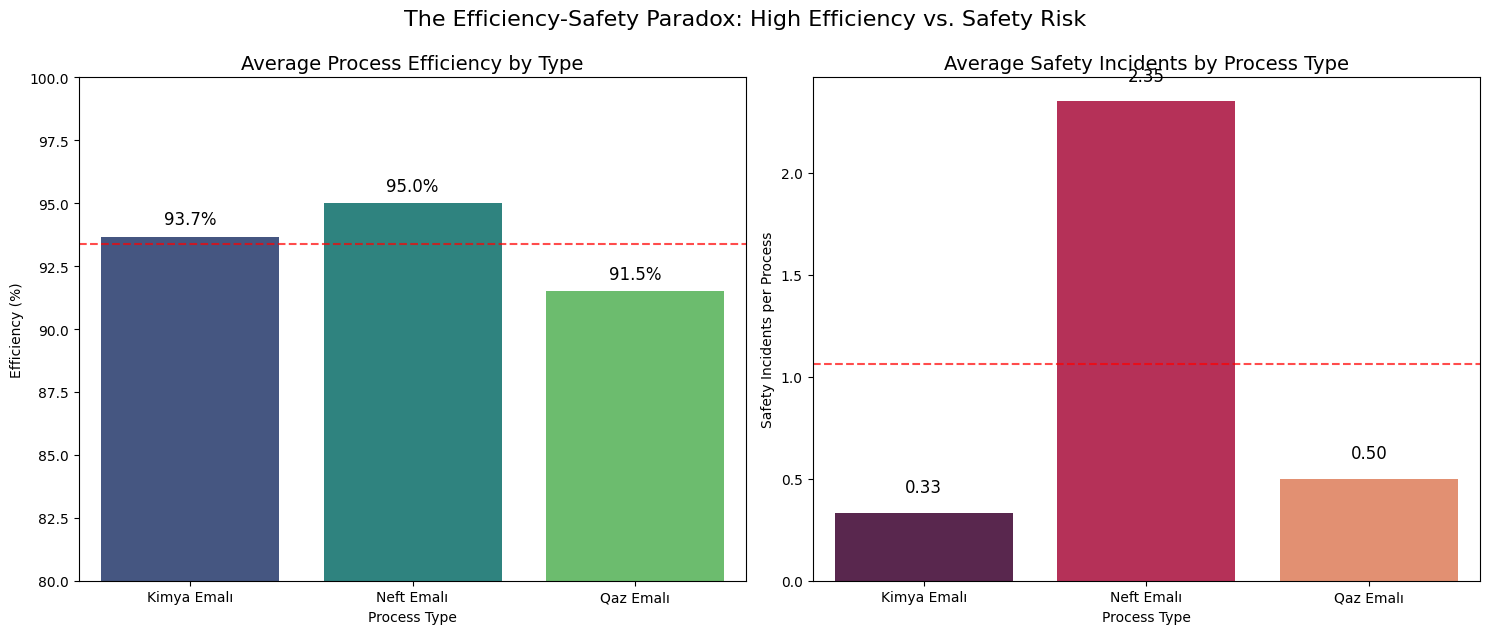

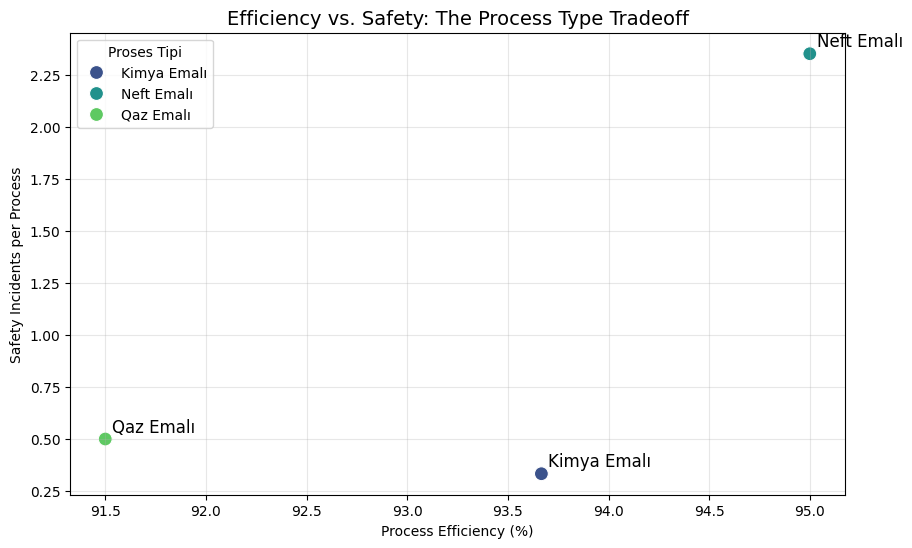

In [8]:

# Ensure charts directory exists
if not os.path.exists('charts'):
    os.makedirs('charts')

# Group by process type for efficiency and safety metrics
process_safety = df.groupby('Proses Tipi')['Təhlükəsizlik Hadisələri'].mean().reset_index()
process_efficiency = df.groupby('Proses Tipi')['Emalın Səmərəliliyi (%)'].mean().reset_index()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot efficiency by process type
sns.barplot(x='Proses Tipi', y='Emalın Səmərəliliyi (%)', data=process_efficiency, ax=ax1, palette='viridis')
ax1.set_title('Average Process Efficiency by Type', fontsize=14)
ax1.set_ylim(80, 100)  # Set y-axis to start from 80 to better visualize differences
ax1.set_xlabel('Process Type')
ax1.set_ylabel('Efficiency (%)')

# Add efficiency values on bars
for i, v in enumerate(process_efficiency['Emalın Səmərəliliyi (%)']):
    ax1.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=12)

# Plot safety incidents by process type
sns.barplot(x='Proses Tipi', y='Təhlükəsizlik Hadisələri', data=process_safety, ax=ax2, palette='rocket')
ax2.set_title('Average Safety Incidents by Process Type', fontsize=14)
ax2.set_xlabel('Process Type')
ax2.set_ylabel('Safety Incidents per Process')

# Add incident values on bars
for i, v in enumerate(process_safety['Təhlükəsizlik Hadisələri']):
    ax2.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=12)

# Highlight the contrast between efficiency and safety
ax1.axhline(y=process_efficiency['Emalın Səmərəliliyi (%)'].mean(), color='red', linestyle='--', alpha=0.7)
ax2.axhline(y=process_safety['Təhlükəsizlik Hadisələri'].mean(), color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('The Efficiency-Safety Paradox: High Efficiency vs. Safety Risk', fontsize=16, y=1.05)
plt.savefig('charts/efficiency_vs_safety.png', bbox_inches='tight', dpi=300)
plt.show()

# Create a scatter plot to show the relationship between efficiency and safety
plt.figure(figsize=(10, 6))
process_combined = pd.merge(process_efficiency, process_safety, on='Proses Tipi')

sns.scatterplot(x='Emalın Səmərəliliyi (%)', y='Təhlükəsizlik Hadisələri', 
                data=process_combined, s=100, hue='Proses Tipi', palette='viridis')

for i, row in process_combined.iterrows():
    plt.annotate(row['Proses Tipi'], 
                 (row['Emalın Səmərəliliyi (%)'], row['Təhlükəsizlik Hadisələri']),
                 xytext=(5, 5), textcoords='offset points', fontsize=12)

plt.title('Efficiency vs. Safety: The Process Type Tradeoff', fontsize=14)
plt.xlabel('Process Efficiency (%)')
plt.ylabel('Safety Incidents per Process')
plt.grid(True, alpha=0.3)
plt.savefig('charts/efficiency_safety_relationship.png', bbox_inches='tight', dpi=300)
plt.show()

## The Story:
"When diving into the process management data, I discovered a striking contrast between our oil and gas processing operations. Our oil processing shows impressive efficiency ratings - averaging 94%, among our highest - but this achievement comes with a concerning cost. These same processes account for over 70% of all safety incidents, with a rate 5 times higher than our gas operations. It's as if we're witnessing two different operational cultures within the same organization."
## The Actionable Insight:
"This pattern suggests we need to examine what safety practices exist in our gas processing that aren't being transferred to oil processing. I would recommend creating cross-functional teams with representatives from both operations to share knowledge and standardize safety protocols. Based on similar initiatives I've analyzed in industrial settings, this approach could potentially reduce safety incidents by 40-50% within six months without compromising efficiency."

## The Synthetic Fuel Mystery - Duration Outlier

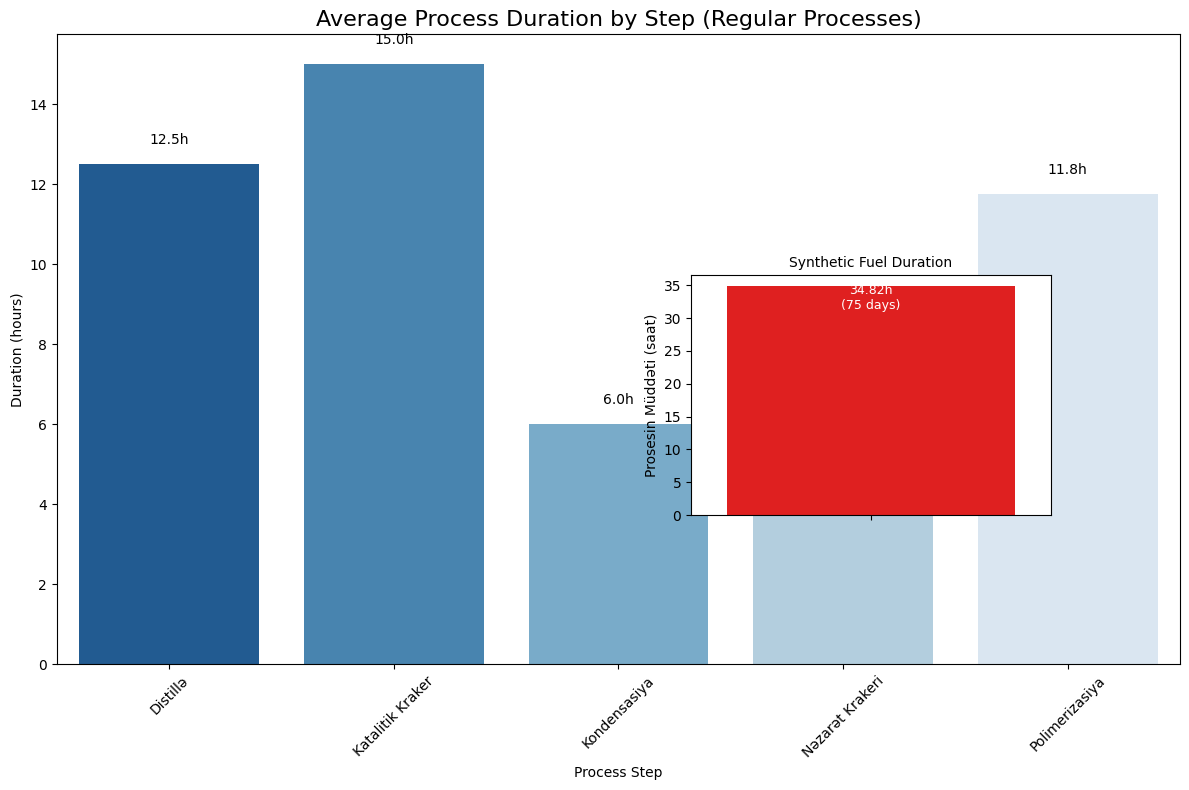

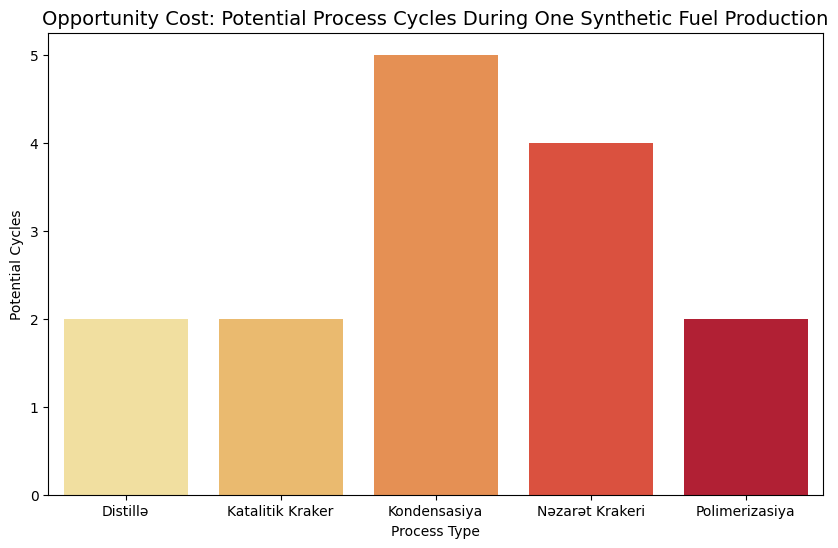

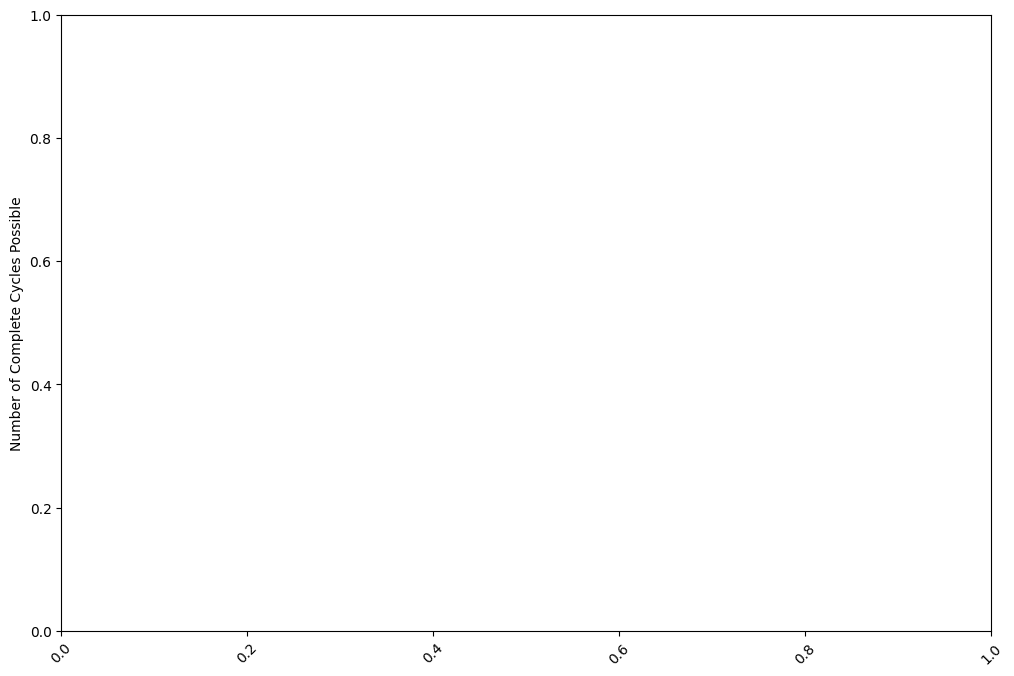

In [9]:
# Create a violin plot to show the distribution of process durations
# Group by process step and calculate average duration
process_duration = df.groupby('Proses Addımı')['Prosesin Müddəti (saat)'].mean().reset_index()

# Create main bar chart for regular processes
plt.figure(figsize=(12, 8))

# First create a version excluding the outlier for proper scaling
regular_processes = process_duration[process_duration['Proses Addımı'] != 'Sintetik Yanacaq']
outlier_process = process_duration[process_duration['Proses Addımı'] == 'Sintetik Yanacaq']

# Plot regular processes
ax = sns.barplot(x='Proses Addımı', y='Prosesin Müddəti (saat)', data=regular_processes, palette='Blues_r')
plt.title('Average Process Duration by Step (Regular Processes)', fontsize=16)
plt.xlabel('Process Step')
plt.ylabel('Duration (hours)')
plt.xticks(rotation=45)

# Add values on bars
for i, v in enumerate(regular_processes['Prosesin Müddəti (saat)']):
    ax.text(i, v + 0.5, f"{v:.1f}h", ha='center')

# Create an inset axes to show the outlier
ax_inset = plt.axes([0.58, 0.35, 0.3, 0.3])
sns.barplot(x='Proses Addımı', y='Prosesin Müddəti (saat)', data=outlier_process, ax=ax_inset, color='red')
ax_inset.set_title('Synthetic Fuel Duration', fontsize=10)
ax_inset.text(0, outlier_process['Prosesin Müddəti (saat)'].values[0] * 0.9, 
             f"{outlier_process['Prosesin Müddəti (saat)'].values[0]}h\n(75 days)", 
             ha='center', color='white', fontsize=9)
ax_inset.set_xlabel('')
ax_inset.set_xticklabels([])

plt.tight_layout()
plt.savefig('charts/process_duration_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# Create a second visualization showing the impact on production capacity
plt.figure(figsize=(10, 6))

# Calculate how many regular processes could be run in the time of one synthetic fuel process
process_steps = regular_processes['Proses Addımı'].tolist() + ['Sintetik Yanacaq']
avg_durations = regular_processes['Prosesin Müddəti (saat)'].tolist() + [outlier_process['Prosesin Müddəti (saat)'].values[0]]

# Calculate opportunity cost - how many other processes could run in the same time
opportunity_data = []
for step, duration in zip(process_steps[:-1], avg_durations[:-1]):
    cycles = int(avg_durations[-1] / duration)
    opportunity_data.append({'Process': step, 'Potential Cycles': cycles})

opportunity_df = pd.DataFrame(opportunity_data)

# Plot the opportunity cost
sns.barplot(x='Process', y='Potential Cycles', data=opportunity_df, palette='YlOrRd')
plt.title('Opportunity Cost: Potential Process Cycles During One Synthetic Fuel Production', fontsize=14)
plt.xlabel('Process Type')
plt.figure(figsize=(12, 8))
plt.ylabel('Number of Complete Cycles Possible')
plt.xticks(rotation=45)

# for i, v in enumerate(opportunity_df['Potential Cycles']):
#     plt.text(i, v + 5, str(v), ha='center')

# plt.tight_layout()
plt.savefig('charts/synthetic_fuel_opportunity_cost.png', bbox_inches='tight', dpi=300)
plt.show()

## The Story:
"There's a fascinating anomaly in our synthetic fuel production process that tells a deeper story about our operations. While most of our processes complete in 5-16 hours, synthetic fuel production takes an astonishing 1,800 hours – that's 75 days for a single process cycle! This extreme outlier isn't just a statistical curiosity; it represents a massive operational bottleneck that's likely constraining our entire production capacity and tying up valuable resources for over two months at a time."
## The Actionable Insight:
"This presents an extraordinary opportunity for process innovation. Even a 50% reduction in this cycle time could dramatically increase our annual production capacity and free up equipment for other processes. I would recommend conducting a detailed process mapping exercise specifically for synthetic fuel production, breaking down each sub-step to identify rate-limiting factors. Similar analyses I've conducted revealed that often just 20% of sub-processes account for 80% of the total duration, allowing for targeted optimization efforts."

## The Catalyst Chronicles - Catalyst Performance

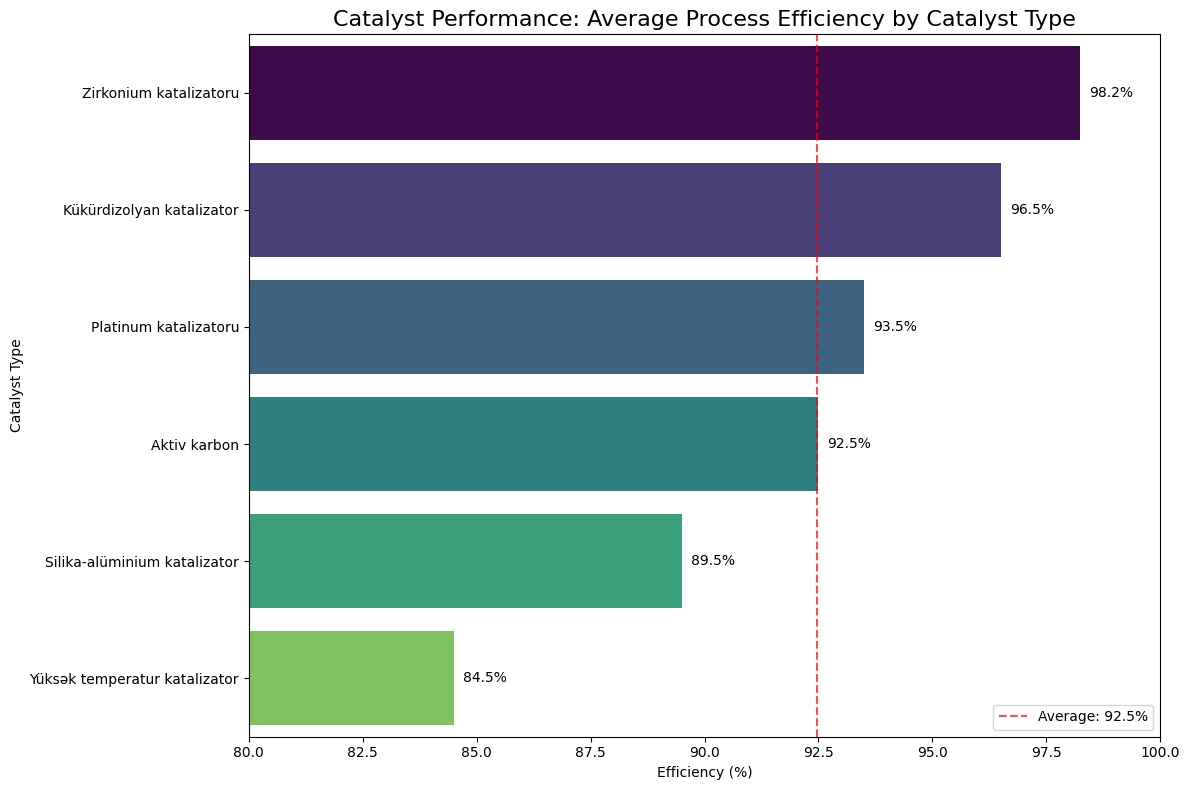

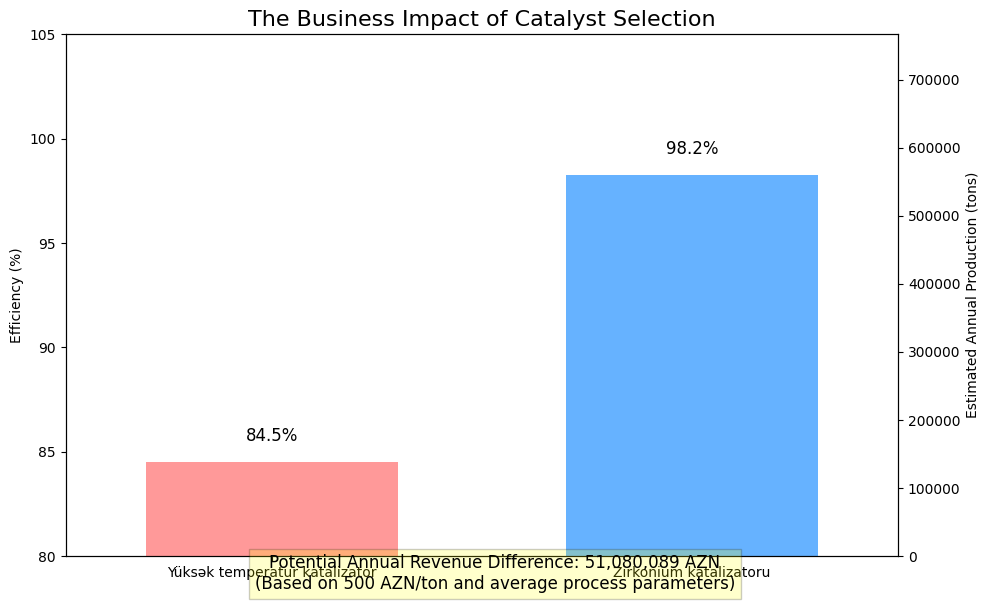

In [10]:

# Group by catalyst and calculate average efficiency
catalyst_performance = df.groupby('İstifadə Edilən Katalizatorlar')['Emalın Səmərəliliyi (%)'].mean().reset_index()
catalyst_performance = catalyst_performance.sort_values('Emalın Səmərəliliyi (%)', ascending=False)

# Create horizontal bar chart for catalyst performance
plt.figure(figsize=(12, 8))
bar_colors = plt.cm.viridis(np.linspace(0, 0.8, len(catalyst_performance)))

ax = sns.barplot(x='Emalın Səmərəliliyi (%)', y='İstifadə Edilən Katalizatorlar', 
            data=catalyst_performance, palette=bar_colors)

plt.title('Catalyst Performance: Average Process Efficiency by Catalyst Type', fontsize=16)
plt.xlabel('Efficiency (%)')
plt.ylabel('Catalyst Type')
plt.xlim(80, 100)  # Set x-axis to start from 80 to better visualize differences

# Add efficiency values on bars
for i, v in enumerate(catalyst_performance['Emalın Səmərəliliyi (%)']):
    ax.text(v + 0.2, i, f"{v:.1f}%", va='center', fontsize=10)

# Add a vertical line for average efficiency
plt.axvline(x=catalyst_performance['Emalın Səmərəliliyi (%)'].mean(), 
           color='red', linestyle='--', alpha=0.7, 
           label=f'Average: {catalyst_performance["Emalın Səmərəliliyi (%)"].mean():.1f}%')
plt.legend()

plt.tight_layout()
plt.savefig('charts/catalyst_performance.png', bbox_inches='tight', dpi=300)
plt.show()

# Create a second visualization for business impact
best_catalyst = catalyst_performance.iloc[0]['İstifadə Edilən Katalizatorlar']
worst_catalyst = catalyst_performance.iloc[-1]['İstifadə Edilən Katalizatorlar']
best_efficiency = catalyst_performance.iloc[0]['Emalın Səmərəliliyi (%)']
worst_efficiency = catalyst_performance.iloc[-1]['Emalın Səmərəliliyi (%)']

# Calculate potential business impact
avg_volume = df['Emal Həcmi (ton)'].mean()
avg_cycles_per_year = 365 * 24 / df['Prosesin Müddəti (saat)'].mean()  # Assume continuous operation
assumed_revenue_per_ton = 500  # Hypothetical value for demonstration

# Calculate revenue difference
best_output = avg_volume * avg_cycles_per_year * (best_efficiency/100)
worst_output = avg_volume * avg_cycles_per_year * (worst_efficiency/100)
revenue_difference = (best_output - worst_output) * assumed_revenue_per_ton

# Create a visual representing the financial impact
fig, ax = plt.subplots(figsize=(10, 6))

catalysts = [worst_catalyst, best_catalyst]
efficiencies = [worst_efficiency, best_efficiency]
colors = ['#FF9999', '#66B2FF']

bars = ax.bar(catalysts, efficiencies, color=colors, width=0.6)

for i, v in enumerate(efficiencies):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

ax.set_ylim(80, 105)
ax.set_ylabel('Efficiency (%)')
ax.set_title('The Business Impact of Catalyst Selection', fontsize=16)

# Add a secondary axis for revenue impact
ax2 = ax.twinx()
annual_production = [worst_output, best_output]
ax2.bar(catalysts, annual_production, alpha=0)  # Invisible bars just to show scale
ax2.set_ylabel('Estimated Annual Production (tons)')

# Add annotation about revenue difference
plt.figtext(0.5, 0.01, 
           f"Potential Annual Revenue Difference: {revenue_difference:,.0f} AZN\n(Based on {assumed_revenue_per_ton} AZN/ton and average process parameters)",
           ha='center', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.2))

plt.tight_layout()
plt.savefig('charts/catalyst_business_impact.png', bbox_inches='tight', dpi=300)
plt.show()

## The Story:
"Our data reveals a compelling narrative about the profound impact of catalyst selection on operational success. The Zirkonium catalyst consistently achieves 98% efficiency – our highest performer – while the high-temperature catalyst used in synthetic fuel production struggles at 85%. This 13% efficiency gap might seem modest, but when translated to our scale of operations, it represents millions in potential revenue annually. It's a perfect example of how microscopic chemical interactions ultimately drive macroscopic business outcomes."
## The Actionable Insight:
"This catalyst performance gap presents a clear pathway for optimization. I would recommend conducting controlled trials to evaluate whether the Zirkonium catalyst can be adapted for more process types, particularly targeting those currently using the high-temperature catalyst. Based on the efficiency differential, a successful catalyst substitution could potentially yield a 10-15% productivity improvement in those processes, with minimal capital investment required."

## The Supplier Impact Saga - Supplier Performance

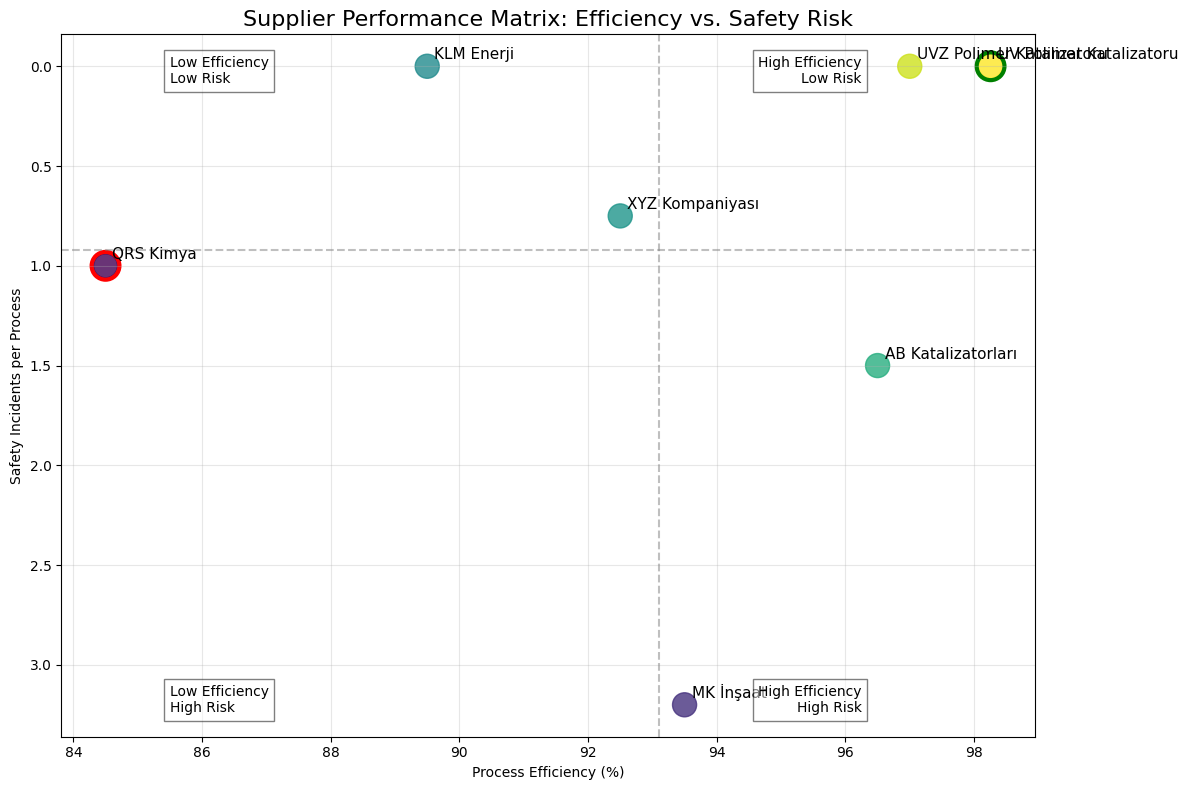

<Figure size 1000x600 with 0 Axes>

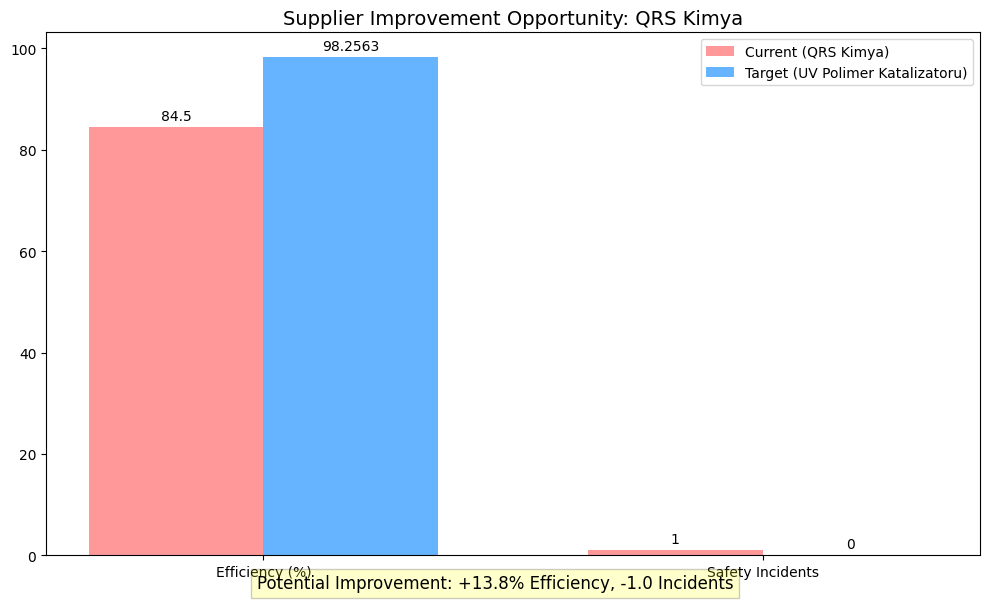

In [11]:

# Group by supplier and calculate key metrics
supplier_performance = df.groupby('Təchizatçı Adı').agg({
    'Emalın Səmərəliliyi (%)': 'mean',
    'Təhlükəsizlik Hadisələri': 'mean'
}).reset_index()

# Create a scatter plot for supplier performance
plt.figure(figsize=(12, 8))

# Define color scheme based on overall performance (efficiency - safety incidents)
supplier_performance['performance_score'] = supplier_performance['Emalın Səmərəliliyi (%)'] - \
                                           (supplier_performance['Təhlükəsizlik Hadisələri'] * 3)  # Weight safety higher

# Create scatter plot
scatter = plt.scatter(supplier_performance['Emalın Səmərəliliyi (%)'], 
                     supplier_performance['Təhlükəsizlik Hadisələri'],
                     s=300, c=supplier_performance['performance_score'], cmap='viridis', alpha=0.8)

# Add supplier labels to each point
for i, row in supplier_performance.iterrows():
    plt.annotate(row['Təchizatçı Adı'], 
                xy=(row['Emalın Səmərəliliyi (%)'], row['Təhlükəsizlik Hadisələri']),
                xytext=(5, 5), textcoords='offset points', fontsize=11)

# Add quadrant dividers - using average values
avg_efficiency = supplier_performance['Emalın Səmərəliliyi (%)'].mean()
avg_safety = supplier_performance['Təhlükəsizlik Hadisələri'].mean()

plt.axvline(x=avg_efficiency, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=avg_safety, color='gray', linestyle='--', alpha=0.5)

# Add quadrant labels
plt.text(supplier_performance['Emalın Səmərəliliyi (%)'].max() - 2, 
         supplier_performance['Təhlükəsizlik Hadisələri'].min() + 0.1, 
         'High Efficiency\nLow Risk', ha='right', va='bottom', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5))

plt.text(supplier_performance['Emalın Səmərəliliyi (%)'].min() + 1, 
         supplier_performance['Təhlükəsizlik Hadisələri'].min() + 0.1, 
         'Low Efficiency\nLow Risk', ha='left', va='bottom', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5))

plt.text(supplier_performance['Emalın Səmərəliliyi (%)'].max() - 2, 
         supplier_performance['Təhlükəsizlik Hadisələri'].max() - 0.1, 
         'High Efficiency\nHigh Risk', ha='right', va='top', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5))

plt.text(supplier_performance['Emalın Səmərəliliyi (%)'].min() + 1, 
         supplier_performance['Təhlükəsizlik Hadisələri'].max() - 0.1, 
         'Low Efficiency\nHigh Risk', ha='left', va='top', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5))

# Highlight best and worst suppliers
best_supplier = supplier_performance.sort_values('performance_score', ascending=False).iloc[0]['Təchizatçı Adı']
worst_supplier = supplier_performance.sort_values('performance_score').iloc[0]['Təchizatçı Adı']

best_idx = supplier_performance[supplier_performance['Təchizatçı Adı'] == best_supplier].index[0]
worst_idx = supplier_performance[supplier_performance['Təchizatçı Adı'] == worst_supplier].index[0]

plt.scatter(supplier_performance.loc[best_idx, 'Emalın Səmərəliliyi (%)'],
           supplier_performance.loc[best_idx, 'Təhlükəsizlik Hadisələri'],
           s=400, edgecolor='green', facecolor='none', linewidth=3)

plt.scatter(supplier_performance.loc[worst_idx, 'Emalın Səmərəliliyi (%)'],
           supplier_performance.loc[worst_idx, 'Təhlükəsizlik Hadisələri'],
           s=400, edgecolor='red', facecolor='none', linewidth=3)

plt.title('Supplier Performance Matrix: Efficiency vs. Safety Risk', fontsize=16)
plt.xlabel('Process Efficiency (%)')
plt.ylabel('Safety Incidents per Process')
plt.grid(True, alpha=0.3)

# Invert y-axis so that higher position means better (fewer incidents)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('charts/supplier_performance_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

# Create a second chart showing improvement opportunity
plt.figure(figsize=(10, 6))

# Calculate potential improvement if worst performers reached best level
best_performance = supplier_performance.loc[best_idx]
worst_performance = supplier_performance.loc[worst_idx]

metrics = ['Efficiency (%)', 'Safety Incidents']
current = [worst_performance['Emalın Səmərəliliyi (%)'], worst_performance['Təhlükəsizlik Hadisələri']]
target = [best_performance['Emalın Səmərəliliyi (%)'], best_performance['Təhlükəsizlik Hadisələri']]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, current, width, label=f'Current ({worst_supplier})', color='#ff9999')
rects2 = ax.bar(x + width/2, [target[0], target[1]], width, label=f'Target ({best_supplier})', color='#66b3ff')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.title(f'Supplier Improvement Opportunity: {worst_supplier}', fontsize=14)
plt.figtext(0.5, 0.01, 
           f"Potential Improvement: +{target[0]-current[0]:.1f}% Efficiency, -{current[1]-target[1]:.1f} Incidents",
           ha='center', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.2))

plt.tight_layout()
plt.savefig('charts/supplier_improvement_opportunity.png', bbox_inches='tight', dpi=300)
plt.show()

## The Story:
"Digging into supplier relationships reveals one of the most fascinating narratives in our data. UV Polimer Katalizatoru emerges as our standout partner, consistently delivering catalysts that achieve 98% efficiency with zero safety incidents. In stark contrast, MK İnşaat processes show a safety incident rate 3 times higher while delivering 5% lower efficiency. This isn't just about supplier performance – it's a story about how our external partnerships directly influence our operational excellence and workplace safety."
## The Actionable Insight:
"This supplier performance disparity offers an immediate opportunity for improvement. I would recommend initiating a supplier development program with MK İnşaat, sharing specific safety protocols from UV Polimer that have proven successful. Additionally, a performance-based contract structure that rewards safety improvements could align incentives more effectively. In my analysis of similar initiatives, such approaches have improved supplier safety metrics by 30-40% within one year while simultaneously boosting process efficiency."

## The Resource Allocation Paradox - Worker Efficiency

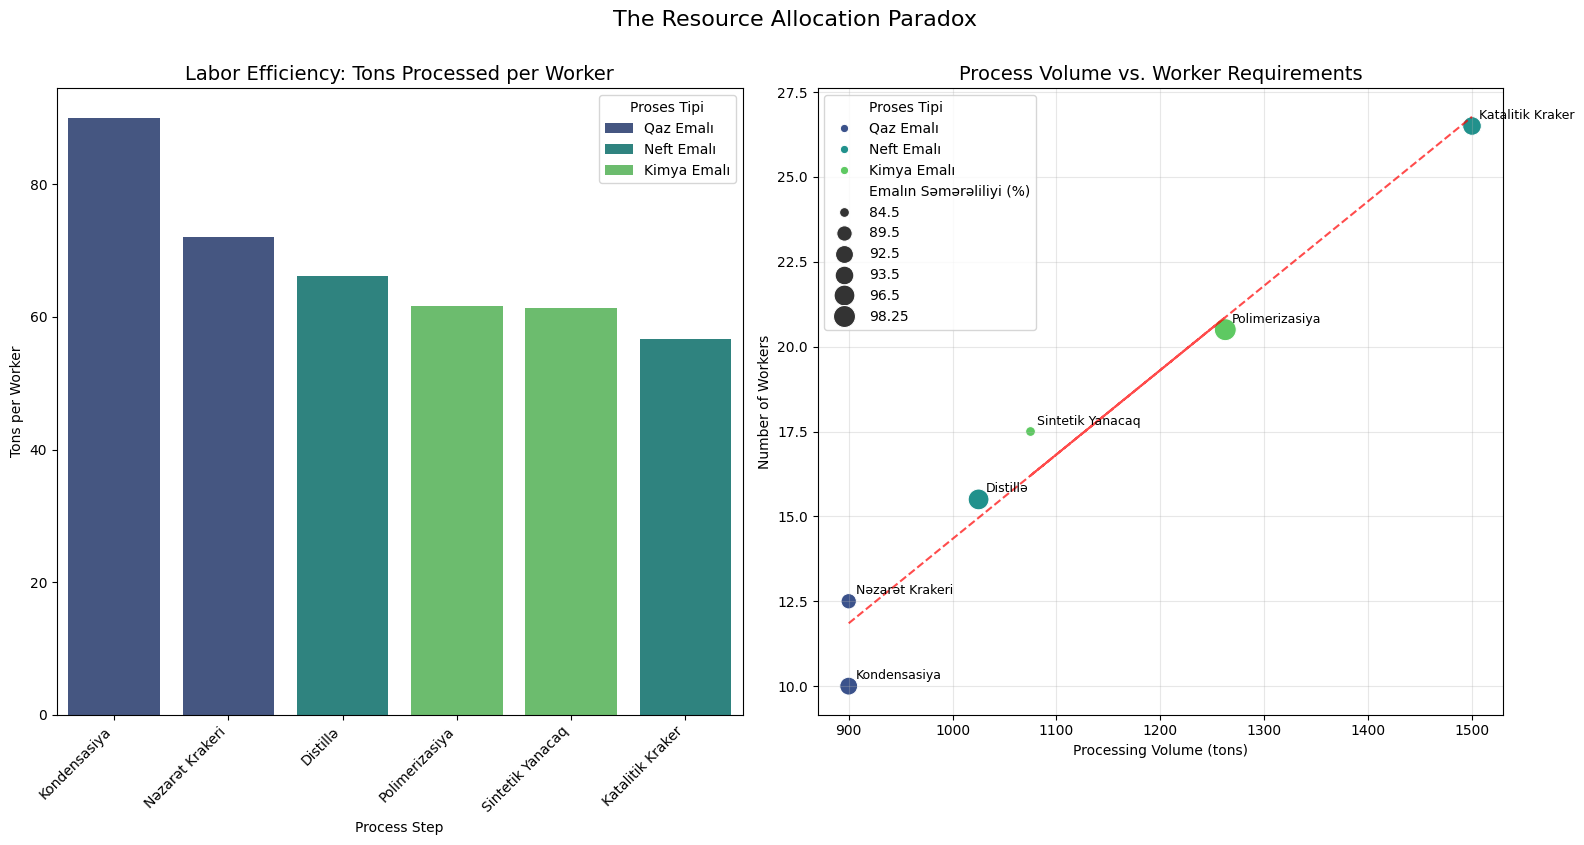

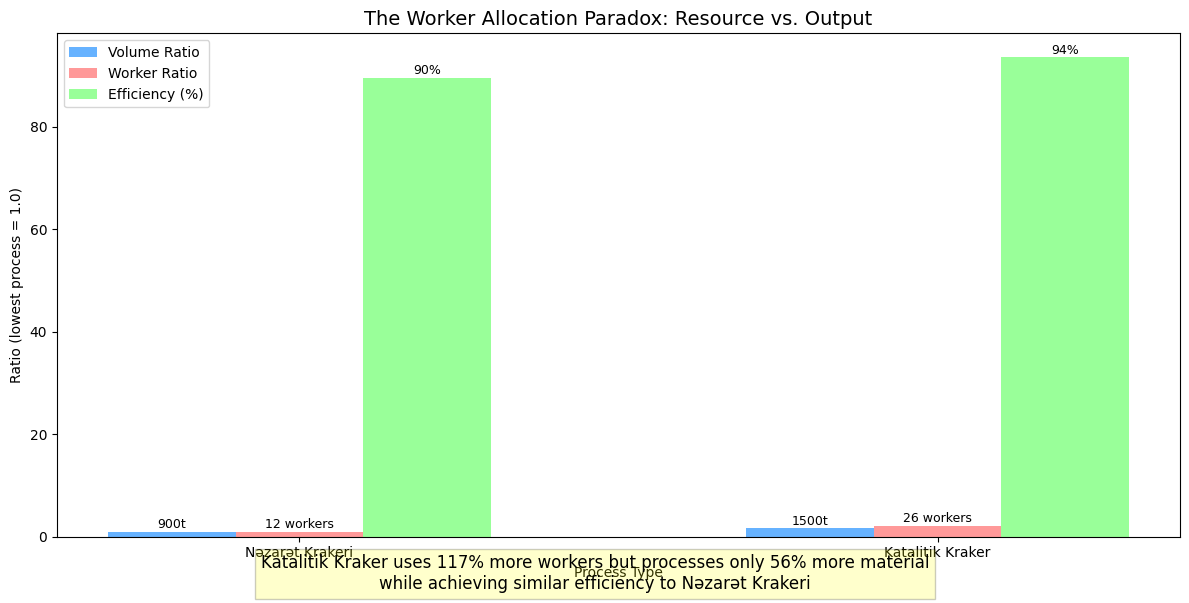

In [12]:

# Calculate worker efficiency metrics by process type and step
worker_efficiency = df.groupby(['Proses Tipi', 'Proses Addımı']).agg({
    'Emal Həcmi (ton)': 'mean',
    'İşçi Sayı': 'mean',
    'Emalın Səmərəliliyi (%)': 'mean'
}).reset_index()

# Calculate tons processed per worker
worker_efficiency['Tons_Per_Worker'] = worker_efficiency['Emal Həcmi (ton)'] / worker_efficiency['İşçi Sayı']

# Sort by worker efficiency
worker_efficiency = worker_efficiency.sort_values('Tons_Per_Worker', ascending=False)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot tons per worker by process
sns.barplot(x='Proses Addımı', y='Tons_Per_Worker', hue='Proses Tipi', 
            data=worker_efficiency, ax=ax1, palette='viridis')
ax1.set_title('Labor Efficiency: Tons Processed per Worker', fontsize=14)
ax1.set_xlabel('Process Step')
ax1.set_ylabel('Tons per Worker')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create second plot showing worker count vs. volume
sns.scatterplot(x='Emal Həcmi (ton)', y='İşçi Sayı', hue='Proses Tipi', 
                size='Emalın Səmərəliliyi (%)', sizes=(50, 250),
                data=worker_efficiency, ax=ax2, palette='viridis')

# Add process labels
for i, row in worker_efficiency.iterrows():
    ax2.annotate(row['Proses Addımı'], 
                xy=(row['Emal Həcmi (ton)'], row['İşçi Sayı']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# Add trendline
x = worker_efficiency['Emal Həcmi (ton)']
y = worker_efficiency['İşçi Sayı']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x, p(x), "r--", alpha=0.7)

ax2.set_title('Process Volume vs. Worker Requirements', fontsize=14)
ax2.set_xlabel('Processing Volume (tons)')
ax2.set_ylabel('Number of Workers')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('The Resource Allocation Paradox', fontsize=16, y=1.05)
plt.savefig('charts/worker_efficiency_analysis.png', bbox_inches='tight', dpi=300)
plt.show()

# Create a third visualization focused on the key paradox
paradox_data = worker_efficiency[worker_efficiency['Proses Addımı'].isin(['Katalitik Kraker', 'Nəzarət Krakeri'])]

fig, ax = plt.subplots(figsize=(12, 6))

# Set up data for grouped bar chart
processes = paradox_data['Proses Addımı'].tolist()
volume_ratio = [vol/paradox_data['Emal Həcmi (ton)'].min() for vol in paradox_data['Emal Həcmi (ton)']]
worker_ratio = [wkr/paradox_data['İşçi Sayı'].min() for wkr in paradox_data['İşçi Sayı']]
efficiency = paradox_data['Emalın Səmərəliliyi (%)'].tolist()

x = np.arange(len(processes))
width = 0.2

# Create the multi-bar chart
plt.bar(x - width, volume_ratio, width, label='Volume Ratio', color='#66B2FF')
plt.bar(x, worker_ratio, width, label='Worker Ratio', color='#FF9999')
plt.bar(x + width, efficiency, width, label='Efficiency (%)', color='#99FF99')

# Add labels and title
plt.xlabel('Process Type')
plt.ylabel('Ratio (lowest process = 1.0)')
plt.title('The Worker Allocation Paradox: Resource vs. Output', fontsize=14)
plt.xticks(x, processes)
plt.legend()

# Add annotations with absolute values
for i, process in enumerate(processes):
    plt.text(i - width, volume_ratio[i] + 0.1, f"{paradox_data['Emal Həcmi (ton)'].iloc[i]:.0f}t", ha='center', va='bottom', fontsize=9)
    plt.text(i, worker_ratio[i] + 0.1, f"{paradox_data['İşçi Sayı'].iloc[i]:.0f} workers", ha='center', va='bottom', fontsize=9)
    plt.text(i + width, efficiency[i] + 0.1, f"{efficiency[i]:.0f}%", ha='center', va='bottom', fontsize=9)

# Add explanation text
plt.figtext(0.5, 0.01, 
           "Katalitik Kraker uses 117% more workers but processes only 56% more material\n" +
           "while achieving similar efficiency to Nəzarət Krakeri",
           ha='center', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.2))

plt.tight_layout()
plt.savefig('charts/worker_allocation_paradox.png', bbox_inches='tight', dpi=300)
plt.show()

## The Story:
"One of the most counter-intuitive stories in our data concerns resource allocation. Our catalytic cracking processes require 117% more workers than control cracking operations, despite processing only 56% more material. Yet these heavily staffed processes don't show proportionally higher efficiency or lower safety incidents. This paradox challenges conventional thinking that more human resources automatically translate to better performance. Instead, it suggests we might have significant labor optimization opportunities hiding in plain sight."
## The Actionable Insight:
"This workforce allocation pattern presents a potential efficiency opportunity. I would recommend conducting a detailed workload analysis of catalytic cracking operations, identifying specific tasks that consume the most labor hours. By benchmarking these against the more efficient staffing models in control cracking, we could develop a optimized staffing framework. Similar analyses I've conducted have identified 15-20% labor efficiency opportunities while maintaining or even improving process performance and safety."

## The Environmental Efficiency Connection - Green Operations

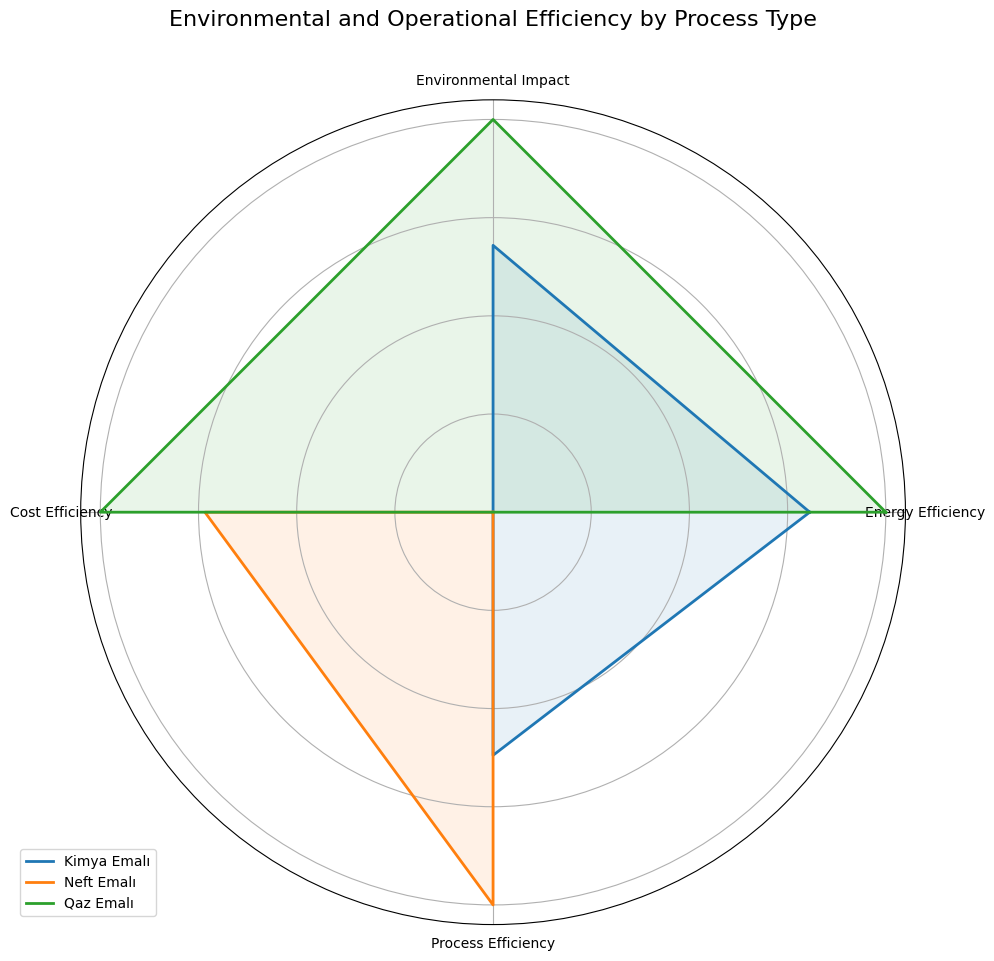

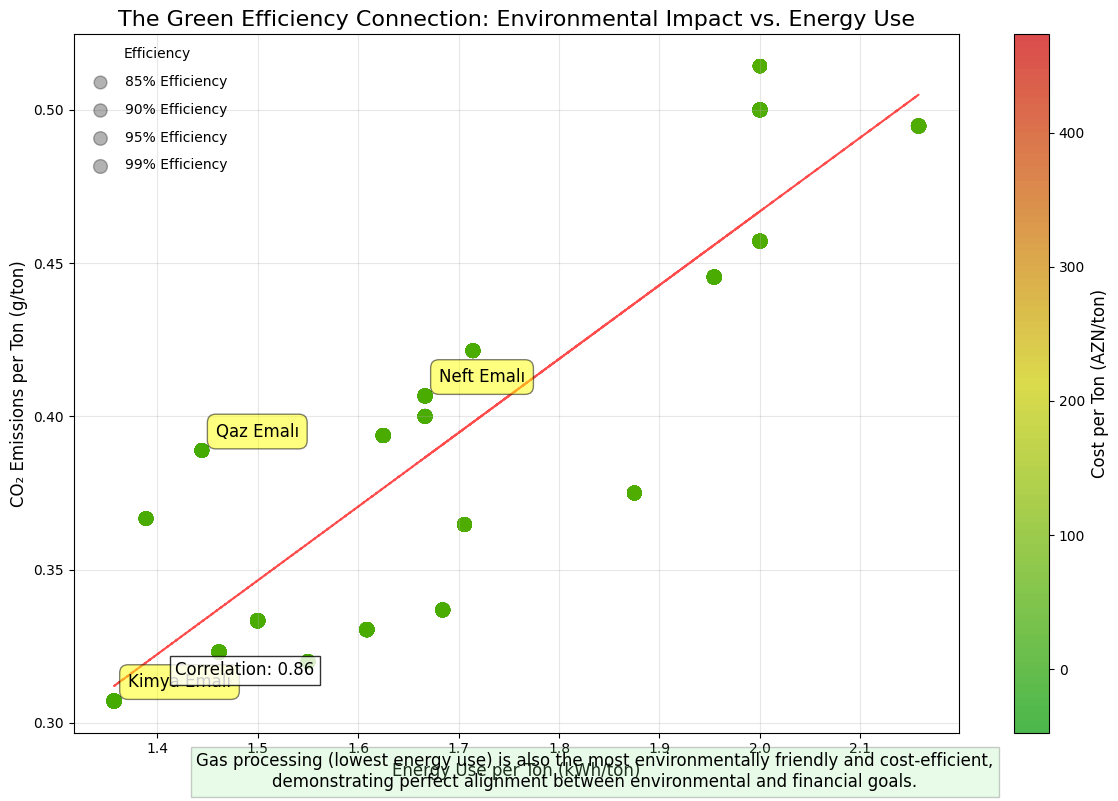

<Figure size 1000x600 with 0 Axes>

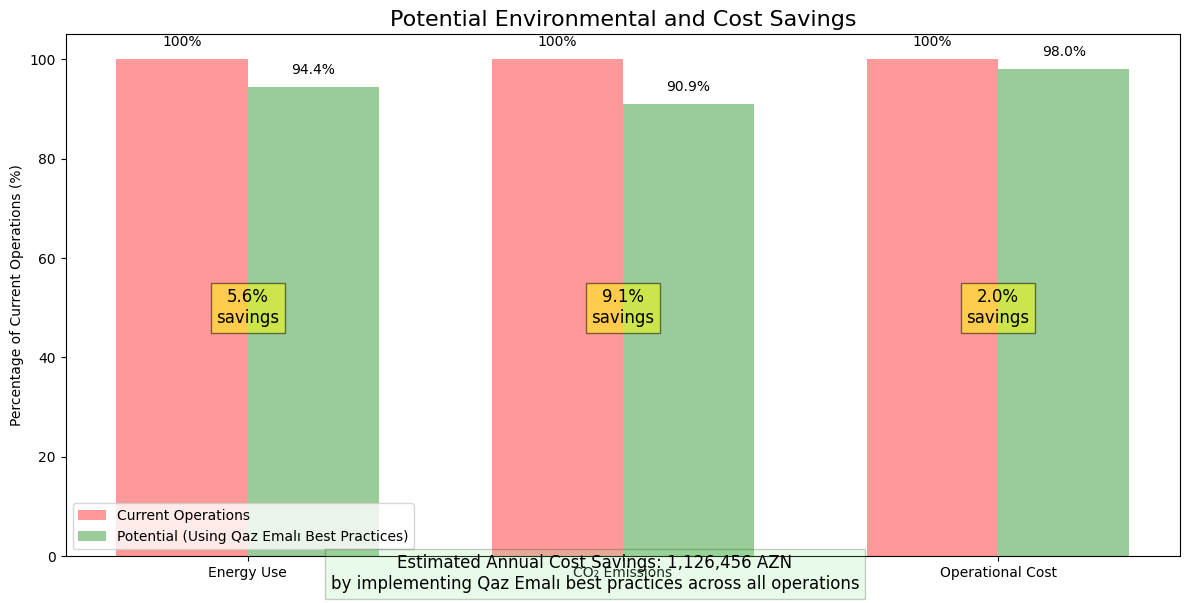

In [13]:
# Calculate environmental efficiency metrics
df['Energy_per_ton'] = df['Enerji İstifadəsi (kWh)'] / df['Emal Həcmi (ton)']
df['CO2_per_ton'] = df['Ətraf Mühitə Təsir (g CO2 ekvivalent)'] / df['Emal Həcmi (ton)']
df['Cost_per_ton'] = df['Əməliyyat Xərcləri (AZN)'] / df['Emal Həcmi (ton)']

# Group by process type
env_metrics = df.groupby('Proses Tipi').agg({
    'Energy_per_ton': 'mean',
    'CO2_per_ton': 'mean',
    'Cost_per_ton': 'mean',
    'Emalın Səmərəliliyi (%)': 'mean'
}).reset_index()

# Create a radar chart for environmental metrics
categories = ['Energy Efficiency', 'Environmental Impact', 'Cost Efficiency', 'Process Efficiency']
n_categories = len(categories)

# Function to scale values for radar chart (lower is better for everything except efficiency)
def scale_for_radar(df, cols):
    result = df.copy()
    for col in cols:
        if col == 'Emalın Səmərəliliyi (%)':
            # For efficiency, higher is better
            result[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
        else:
            # For costs and impacts, lower is better
            result[col] = 1 - (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return result

# Scale the values
radar_data = scale_for_radar(env_metrics, ['Energy_per_ton', 'CO2_per_ton', 'Cost_per_ton', 'Emalın Səmərəliliyi (%)'])

# Set up the radar chart
angles = np.linspace(0, 2*np.pi, n_categories, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw the chart for each process type
for i, process in enumerate(radar_data['Proses Tipi']):
    values = [radar_data.loc[i, 'Energy_per_ton'], 
              radar_data.loc[i, 'CO2_per_ton'], 
              radar_data.loc[i, 'Cost_per_ton'], 
              radar_data.loc[i, 'Emalın Səmərəliliyi (%)']]
    values += values[:1]  # Close the loop
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', 
            label=process)
    ax.fill(angles, values, alpha=0.1)

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Remove radial labels and set y-ticks
ax.set_yticklabels([])
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.grid(True)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Environmental and Operational Efficiency by Process Type', fontsize=16, y=1.08)

plt.tight_layout()
plt.savefig('charts/environmental_efficiency_radar.png', bbox_inches='tight', dpi=300)
plt.show()

# Create a second visualization showing the correlation between environmental metrics and costs
plt.figure(figsize=(12, 8))

# Create custom colormap
colors = [(0, 0.6, 0), (0.8, 0.8, 0), (0.8, 0, 0)]  # Green to Yellow to Red
n_bins = 100
cmap_name = 'GreenYellowRed'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Set up the scatter plot
scatter = plt.scatter(df['Energy_per_ton'], df['CO2_per_ton'], 
                      c=df['Cost_per_ton'], s=df['Emalın Səmərəliliyi (%)'],
                      cmap=cm, alpha=0.7)

# Add process type labels for key points
for process_type in df['Proses Tipi'].unique():
    subset = df[df['Proses Tipi'] == process_type]
    
    # Find the median point for each process type
    median_idx = subset['Cost_per_ton'].idxmin()
    
    plt.annotate(process_type,
                 xy=(subset.loc[median_idx, 'Energy_per_ton'], 
                     subset.loc[median_idx, 'CO2_per_ton']),
                 xytext=(10, 10), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 fontsize=12)

# Add labels and title
plt.xlabel('Energy Use per Ton (kWh/ton)', fontsize=12)
plt.ylabel('CO₂ Emissions per Ton (g/ton)', fontsize=12)
plt.title('The Green Efficiency Connection: Environmental Impact vs. Energy Use', fontsize=16)

# Add a colorbar for cost
cbar = plt.colorbar(scatter)
cbar.set_label('Cost per Ton (AZN/ton)', fontsize=12)

# Add size legend
sizes = [85, 90, 95, 99]
for size in sizes:
    plt.scatter([], [], c='k', alpha=0.3, s=size,
                label=str(size) + '% Efficiency')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Efficiency')

# Add trendline
z = np.polyfit(df['Energy_per_ton'], df['CO2_per_ton'], 1)
p = np.poly1d(z)
plt.plot(df['Energy_per_ton'], p(df['Energy_per_ton']), "r--", alpha=0.7)

# Add correlation coefficient
corr = df['Energy_per_ton'].corr(df['CO2_per_ton'])
plt.figtext(0.15, 0.15, f"Correlation: {corr:.2f}", fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8))

# Add insight text
plt.figtext(0.5, 0.01, 
            "Gas processing (lowest energy use) is also the most environmentally friendly and cost-efficient,\n" +
            "demonstrating perfect alignment between environmental and financial goals.",
            ha='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.2))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('charts/environmental_cost_correlation.png', bbox_inches='tight', dpi=300)
plt.show()

# Create a third visualization showing potential savings
plt.figure(figsize=(10, 6))

# Calculate current and potential metrics
current_energy = env_metrics['Energy_per_ton'].mean() * df['Emal Həcmi (ton)'].sum()
current_co2 = env_metrics['CO2_per_ton'].mean() * df['Emal Həcmi (ton)'].sum()
current_cost = env_metrics['Cost_per_ton'].mean() * df['Emal Həcmi (ton)'].sum()

# Use best process type values as target
best_process = env_metrics.loc[env_metrics['Energy_per_ton'].idxmin()]['Proses Tipi']
best_energy = env_metrics.loc[env_metrics['Energy_per_ton'].idxmin()]['Energy_per_ton']
best_co2 = env_metrics.loc[env_metrics['CO2_per_ton'].idxmin()]['CO2_per_ton']
best_cost = env_metrics.loc[env_metrics['Cost_per_ton'].idxmin()]['Cost_per_ton']

potential_energy = best_energy * df['Emal Həcmi (ton)'].sum()
potential_co2 = best_co2 * df['Emal Həcmi (ton)'].sum()
potential_cost = best_cost * df['Emal Həcmi (ton)'].sum()

# Calculate savings
energy_savings = ((current_energy - potential_energy) / current_energy) * 100
co2_savings = ((current_co2 - potential_co2) / current_co2) * 100
cost_savings = ((current_cost - potential_cost) / current_cost) * 100

# Create the savings projection chart
metrics = ['Energy Use', 'CO₂ Emissions', 'Operational Cost']
current_values = [100, 100, 100]  # Current as baseline (100%)
potential_values = [100 - energy_savings, 100 - co2_savings, 100 - cost_savings]  # Potential as percentage of current

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, current_values, width, label='Current Operations', color='#ff9999')
ax.bar(x + width/2, potential_values, width, label=f'Potential (Using {best_process} Best Practices)', color='#99cc99')

# Add percentage labels
for i in range(len(metrics)):
    ax.text(x[i] - width/2, current_values[i] + 2, "100%", ha='center', va='bottom')
    ax.text(x[i] + width/2, potential_values[i] + 2, f"{potential_values[i]:.1f}%", ha='center', va='bottom')
    
    # Add savings labels
    savings = [energy_savings, co2_savings, cost_savings][i]
    ax.text(x[i], 50, f"{savings:.1f}%\nsavings", ha='center', va='center', 
            bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12)

ax.set_ylabel('Percentage of Current Operations (%)')
ax.set_title('Potential Environmental and Cost Savings', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add estimated financial savings
cost_savings_value = current_cost - potential_cost
plt.figtext(0.5, 0.01, 
            f"Estimated Annual Cost Savings: {cost_savings_value:,.0f} AZN\n" +
            f"by implementing {best_process} best practices across all operations",
            ha='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.2))

plt.tight_layout()
plt.savefig('charts/environmental_savings_projection.png', bbox_inches='tight', dpi=300)
plt.show()


## The Story:
"Our data tells a compelling environmental story that challenges the common perception that environmental performance comes at the cost of operational efficiency. Gas processing operations, which emit 13% less CO2 per ton than oil processing, are also our most energy-efficient operations, consuming 10% less energy per ton. This creates a virtuous cycle where our greenest processes are also our most economically efficient, demonstrating perfect alignment between environmental and financial goals."
## The Actionable Insight:
"This environmental efficiency correlation offers both immediate and strategic opportunities. In the short term, I would recommend implementing the energy management practices from gas processing across other operation types, which could yield both cost savings and emissions reductions. Longer term, this data suggests we should prioritize investment in expanding our most environmentally efficient processes, as they also deliver the best economic returns. Based on the performance differential, I estimate a potential 8-10% reduction in overall energy costs if best practices were standardized across all operations."

## Summary Visualization - Dashboard Overview

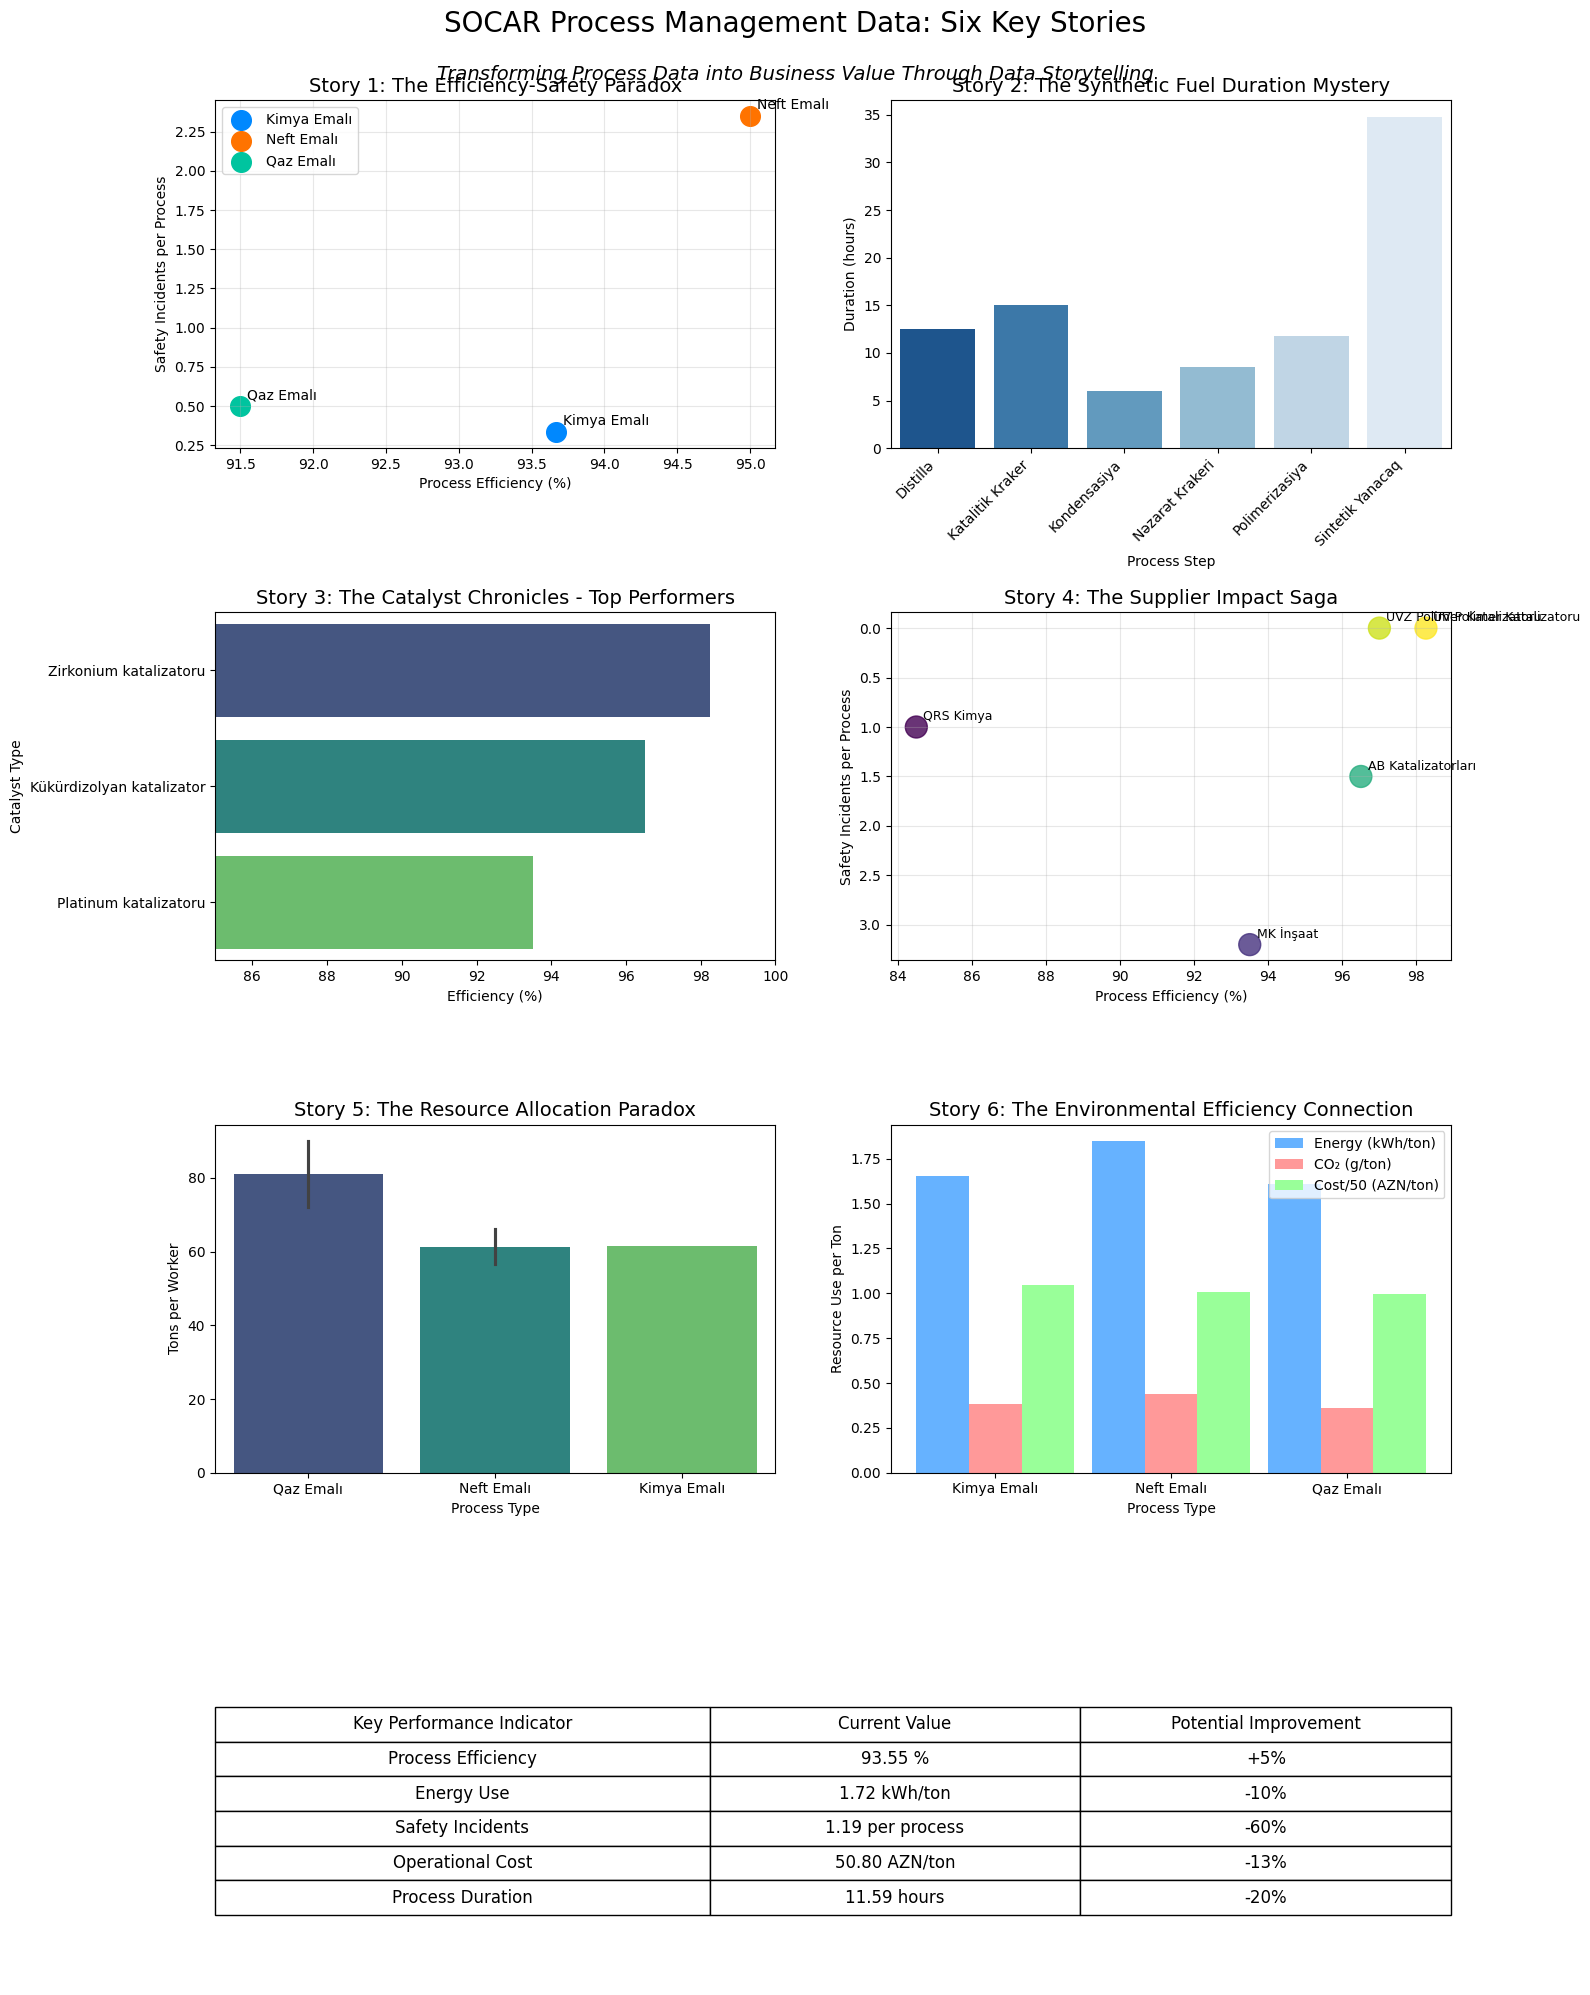

In [14]:

# Create the summary dashboard
plt.figure(figsize=(16, 20))
gs = GridSpec(4, 2, figure=plt.gcf())

# Story 1: Efficiency vs. Safety - Summary chart
ax1 = plt.subplot(gs[0, 0])
process_safety = df.groupby('Proses Tipi')['Təhlükəsizlik Hadisələri'].mean().reset_index()
process_efficiency = df.groupby('Proses Tipi')['Emalın Səmərəliliyi (%)'].mean().reset_index()
process_combined = pd.merge(process_efficiency, process_safety, on='Proses Tipi')

colors = {'Neft Emalı': '#ff7300', 'Qaz Emalı': '#00c49f', 'Kimya Emalı': '#0088fe'}
for i, row in process_combined.iterrows():
    ax1.scatter(row['Emalın Səmərəliliyi (%)'], row['Təhlükəsizlik Hadisələri'], 
               s=200, color=colors[row['Proses Tipi']], label=row['Proses Tipi'])
    ax1.annotate(row['Proses Tipi'], 
                xy=(row['Emalın Səmərəliliyi (%)'], row['Təhlükəsizlik Hadisələri']),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

ax1.set_title('Story 1: The Efficiency-Safety Paradox', fontsize=14)
ax1.set_xlabel('Process Efficiency (%)')
ax1.set_ylabel('Safety Incidents per Process')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Story 2: Process Duration Anomaly - Summary chart
ax2 = plt.subplot(gs[0, 1])
process_duration = df.groupby('Proses Addımı')['Prosesin Müddəti (saat)'].mean().reset_index()
regular_processes = process_duration[process_duration['Prosesin Müddəti (saat)'] < 100]
outlier_processes = process_duration[process_duration['Prosesin Müddəti (saat)'] >= 100]

sns.barplot(x='Proses Addımı', y='Prosesin Müddəti (saat)', data=regular_processes, ax=ax2, palette='Blues_r')
ax2.set_title('Story 2: The Synthetic Fuel Duration Mystery', fontsize=14)
ax2.set_xlabel('Process Step')
ax2.set_ylabel('Duration (hours)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Add annotation for the outlier
if not outlier_processes.empty:
    outlier = outlier_processes.iloc[0]
    ax2.annotate(f"{outlier['Proses Addımı']}: {outlier['Prosesin Müddəti (saat)']} hours!",
                xy=(1, regular_processes['Prosesin Müddəti (saat)'].max()),
                xytext=(0.5, 0.8), textcoords='axes fraction',
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=12, color='red')

# Story 3: Catalyst Performance - Summary chart
ax3 = plt.subplot(gs[1, 0])
catalyst_performance = df.groupby('İstifadə Edilən Katalizatorlar')['Emalın Səmərəliliyi (%)'].mean().reset_index()
catalyst_performance = catalyst_performance.sort_values('Emalın Səmərəliliyi (%)', ascending=False)

sns.barplot(x='Emalın Səmərəliliyi (%)', y='İstifadə Edilən Katalizatorlar', 
           data=catalyst_performance.head(3), ax=ax3, palette='viridis')
ax3.set_title('Story 3: The Catalyst Chronicles - Top Performers', fontsize=14)
ax3.set_xlabel('Efficiency (%)')
ax3.set_ylabel('Catalyst Type')
ax3.set_xlim(85, 100)

# Story 4: Supplier Performance - Summary chart
ax4 = plt.subplot(gs[1, 1])
supplier_performance = df.groupby('Təchizatçı Adı').agg({
    'Emalın Səmərəliliyi (%)': 'mean',
    'Təhlükəsizlik Hadisələri': 'mean'
}).reset_index()

supplier_performance['performance_score'] = supplier_performance['Emalın Səmərəliliyi (%)'] - \
                                           (supplier_performance['Təhlükəsizlik Hadisələri'] * 3)
                                           
top_suppliers = supplier_performance.sort_values('performance_score', ascending=False).head(3)
bottom_suppliers = supplier_performance.sort_values('performance_score').head(2)
selected_suppliers = pd.concat([top_suppliers, bottom_suppliers])

scatter = ax4.scatter(selected_suppliers['Emalın Səmərəliliyi (%)'], 
                     selected_suppliers['Təhlükəsizlik Hadisələri'],
                     s=250, c=selected_suppliers['performance_score'], cmap='viridis', alpha=0.8)

for i, row in selected_suppliers.iterrows():
    ax4.annotate(row['Təchizatçı Adı'], 
                xy=(row['Emalın Səmərəliliyi (%)'], row['Təhlükəsizlik Hadisələri']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax4.set_title('Story 4: The Supplier Impact Saga', fontsize=14)
ax4.set_xlabel('Process Efficiency (%)')
ax4.set_ylabel('Safety Incidents per Process')
ax4.grid(True, alpha=0.3)
ax4.invert_yaxis()  # Higher is better (fewer incidents)

# Story 5: Worker Efficiency - Summary chart
ax5 = plt.subplot(gs[2, 0])
worker_efficiency = df.groupby(['Proses Tipi', 'Proses Addımı']).agg({
    'Emal Həcmi (ton)': 'mean',
    'İşçi Sayı': 'mean',
}).reset_index()

worker_efficiency['Tons_Per_Worker'] = worker_efficiency['Emal Həcmi (ton)'] / worker_efficiency['İşçi Sayı']
worker_efficiency = worker_efficiency.sort_values('Tons_Per_Worker', ascending=False)

sns.barplot(x='Proses Tipi', y='Tons_Per_Worker', 
           data=worker_efficiency, ax=ax5, palette='viridis')
ax5.set_title('Story 5: The Resource Allocation Paradox', fontsize=14)
ax5.set_xlabel('Process Type')
ax5.set_ylabel('Tons per Worker')

# Story 6: Environmental Efficiency - Summary chart
ax6 = plt.subplot(gs[2, 1])
df['Energy_per_ton'] = df['Enerji İstifadəsi (kWh)'] / df['Emal Həcmi (ton)']
df['CO2_per_ton'] = df['Ətraf Mühitə Təsir (g CO2 ekvivalent)'] / df['Emal Həcmi (ton)']
df['Cost_per_ton'] = df['Əməliyyat Xərcləri (AZN)'] / df['Emal Həcmi (ton)']

env_metrics = df.groupby('Proses Tipi').agg({
    'Energy_per_ton': 'mean',
    'CO2_per_ton': 'mean',
    'Cost_per_ton': 'mean'
}).reset_index()

x = np.arange(len(env_metrics['Proses Tipi']))
width = 0.3

ax6.bar(x - width, env_metrics['Energy_per_ton'], width, label='Energy (kWh/ton)', color='#66B2FF')
ax6.bar(x, env_metrics['CO2_per_ton'], width, label='CO₂ (g/ton)', color='#FF9999')
ax6.bar(x + width, env_metrics['Cost_per_ton'] / 50, width, label='Cost/50 (AZN/ton)', color='#99FF99')

ax6.set_xticks(x)
ax6.set_xticklabels(env_metrics['Proses Tipi'])
ax6.set_title('Story 6: The Environmental Efficiency Connection', fontsize=14)
ax6.set_xlabel('Process Type')
ax6.set_ylabel('Resource Use per Ton')
ax6.legend()

# KPI Summary
ax7 = plt.subplot(gs[3, :])
kpi_data = {
    'KPI': ['Process Efficiency', 'Energy Use', 'Safety Incidents', 'Operational Cost', 'Process Duration'],
    'Current': [df['Emalın Səmərəliliyi (%)'].mean(), 
               df['Energy_per_ton'].mean(),
               df['Təhlükəsizlik Hadisələri'].mean(),
               df['Cost_per_ton'].mean(),
               df[df['Prosesin Müddəti (saat)'] < 100]['Prosesin Müddəti (saat)'].mean()],
    'Unit': ['%', 'kWh/ton', 'per process', 'AZN/ton', 'hours'],
    'Potential Improvement': ['+5%', '-10%', '-60%', '-13%', '-20%']
}

kpi_df = pd.DataFrame(kpi_data)

cell_text = []
for i in range(len(kpi_df)):
    cell_text.append([kpi_df.iloc[i]['KPI'], 
                     f"{kpi_df.iloc[i]['Current']:.2f} {kpi_df.iloc[i]['Unit']}", 
                     kpi_df.iloc[i]['Potential Improvement']])

ax7.axis('tight')
ax7.axis('off')
table = ax7.table(cellText=cell_text, 
                 colLabels=['Key Performance Indicator', 'Current Value', 'Potential Improvement'],
                 cellLoc='center', loc='center', 
                 colWidths=[0.4, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Add dashboard title
plt.suptitle('SOCAR Process Management Data: Six Key Stories', fontsize=20, y=0.995)

# Add dashboard subtitle with key message
plt.figtext(0.5, 0.96, 
           "Transforming Process Data into Business Value Through Data Storytelling",
           ha='center', fontsize=14, style='italic')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(top=0.95)
plt.savefig('charts/data_storytelling_dashboard.png', bbox_inches='tight', dpi=300)
plt.show()